In [8]:
import pickle
import matplotlib.pyplot as plt
import hist
import mplhep as hep
import numpy as np
from coffea import hist as hist2

In [26]:
# tag = 'ak15only_3dbinning'
# tag = 'hybrid_3dbinning'
tag = 'ak8only_3dbinning'

In [27]:
if 'hybrid' in tag:
    fname = '../outPickles/out_hybrid.pickle'
elif 'ak15' in tag:
    fname = '../outPickles/out_morebins.pickle'
else:
    fname = '../outPickles/out_ak8_3d.pickle'
    
with open(fname, 'rb') as f:
    x = pickle.load(f)

In [28]:
print(x)

{'den': Hist(
  Variable([0, 250, 300, 350, 400, 500, 750, 1000], name='jet2pt', label='AK15 Fat Jet 2 $p_T$ (GeV)'),
  Regular(50, 0, 1000, name='jet1pt', label='AK15 Fat Jet 1 $p_T$ (GeV)'),
  Regular(15, 0, 300, name='jet1msd', label='AK15 Fat Jet 1 MassSD (GeV)'),
  storage=Double()) # Sum: 14600867.0 (23238947.0 with flow), 'num': Hist(
  Variable([0, 250, 300, 350, 400, 500, 750, 1000], name='jet2pt', label='AK15 Fat Jet 2 $p_T$ (GeV)'),
  Regular(50, 0, 1000, name='jet1pt', label='AK15 Fat Jet 1 $p_T$ (GeV)'),
  Regular(15, 0, 300, name='jet1msd', label='AK15 Fat Jet 1 MassSD (GeV)'),
  storage=Double()) # Sum: 995220.0 (1018818.0 with flow)}


In [29]:
if 'hybrid' in tag:
    jetpt_den = x['den'][{"bbjetmsd": sum}]
    jetpt_num = x['num'][{"bbjetmsd": sum}]
else:
    jetpt_den = x['den'][{"jet1msd": sum}]
    jetpt_num = x['num'][{"jet1msd": sum}]
print(jetpt_den[0,:])

                     +-------------------------------------------------------+
[-inf,    0) 0       |                                                       |
[   0,   20) 0       |                                                       |
[  20,   40) 0       |                                                       |
[  40,   60) 0       |                                                       |
[  60,   80) 0       |                                                       |
[  80,  100) 0       |                                                       |
[ 100,  120) 0       |                                                       |
[ 120,  140) 0       |                                                       |
[ 140,  160) 0       |                                                       |
[ 160,  180) 3265274 |==================================                     |
[ 180,  200) 5117666 |====================================================== |
[ 200,  220) 3673664 |==============================

<ipython-input-30-e2056c96847d>:9: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-30-e2056c96847d>:9: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-30-e2056c96847d>:9: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-30-e2056c96847d>:9: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-30-e2056c96847d>:9: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_p

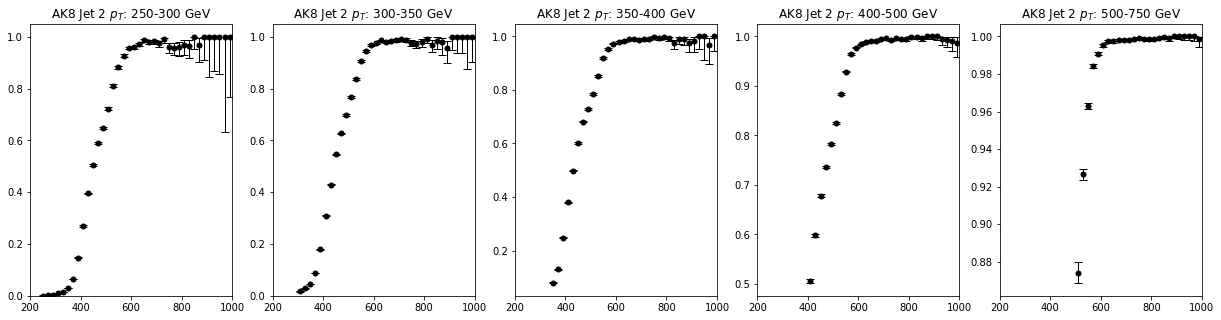

In [30]:
fig, ax = plt.subplots(1, 5, figsize=(21,5))

jetstr = 'AK8' if 'ak8' in tag else 'AK15'

ptbins = ['0-250','250-300', '300-350', '350-400', '400-500', '500-750', '750-1000']
for i in range(1,6):
    hep.histplot(jetpt_num[i,:]/jetpt_den[i,:], 
                 # yerr is the relative shift from the y value
                 yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
                 ax = ax[i-1],
                 histtype='errorbar', color='k', capsize=4, elinewidth=1,
                
    )
    #ax[i-1].set_ylim(0, 1)
    ax[i-1].set_xlim(200, 1000)
    ax[i-1].set_title(f'{jetstr} Jet 2 $p_T$: {ptbins[i]} GeV')
    
fig.savefig('1deff_%s.pdf'%tag)

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9df1544850>, errorbar=None, legend_artist=None)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9df1544a90>, errorbar=None, legend_artist=None)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f9df1544d00>, errorbar=<ErrorbarContainer object of 3 artists>))

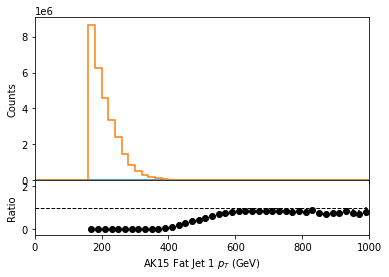

In [13]:
jetpt_num[0,:].plot_ratio(jetpt_den[0,:])

<ipython-input-14-b9bcef6c2d09>:1: RuntimeWarning: invalid value encountered in true_divide
  hep.histplot(jetpt_num[0,:]/jetpt_den[0,:], yerr=np.sqrt(jetpt_num[0,:])/jetpt_den[0,:],


[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

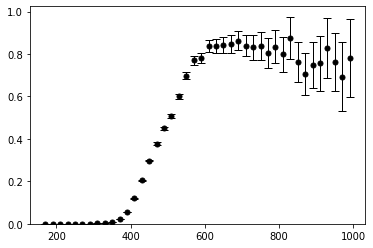

In [14]:
hep.histplot(jetpt_num[0,:]/jetpt_den[0,:], yerr=np.sqrt(jetpt_num[0,:])/jetpt_den[0,:],
    histtype='errorbar', color='k', capsize=4)

<ipython-input-7-0a9130a45658>:5: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[1,:].view(), jetpt_den[1,:].view()) - jetpt_num[1,:].view()/jetpt_den[1,:].view()),


[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

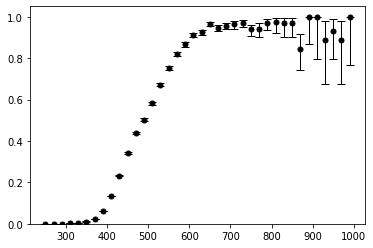

In [7]:
from hist.intervals import clopper_pearson_interval

jetpt_num[1,:].view()
hep.histplot(jetpt_num[1,:]/jetpt_den[1,:], 
             yerr=abs(clopper_pearson_interval(jetpt_num[1,:].view(), jetpt_den[1,:].view()) - jetpt_num[1,:].view()/jetpt_den[1,:].view()),
             histtype='errorbar', color='k', capsize=4, elinewidth=1,
)


/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/hist/intervals.py:135: RuntimeWarning: invalid value encountered in true_divide
  ratio = num / denom
/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/hist/intervals.py:137: RuntimeWarning: invalid value encountered in true_divide
  ratio_uncert = np.abs(poisson_interval(ratio, num / np.square(denom)) - ratio)


[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

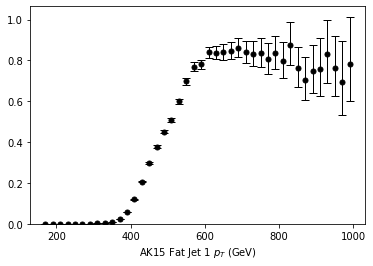

In [9]:
from hist.intervals import ratio_uncertainty

hep.histplot(jetpt_num[0,:]/jetpt_den[0,:], 
             yerr=ratio_uncertainty(jetpt_num[0,:].view(), jetpt_den[0,:].view(), "poisson"),
             histtype='errorbar', color='k', capsize=4, elinewidth=1,
)

/Users/cmantill/miniconda3/envs/hww/lib/python3.7/site-packages/hist/intervals.py:135: RuntimeWarning: invalid value encountered in true_divide
  ratio = num / denom


[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

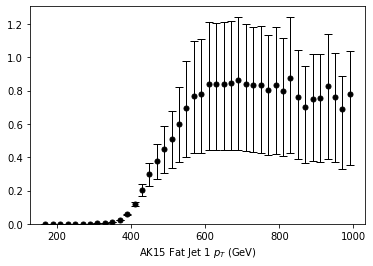

In [10]:

hep.histplot(jetpt_num[0,:]/jetpt_den[0,:], 
             yerr=ratio_uncertainty(jetpt_num[0,:].view(), jetpt_den[0,:].view(), "poisson-ratio"),
             histtype='errorbar', color='k', capsize=4, elinewidth=1,
)

<ipython-input-16-4d41e3f10066>:7: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-16-4d41e3f10066>:7: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-16-4d41e3f10066>:7: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-16-4d41e3f10066>:7: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
<ipython-input-16-4d41e3f10066>:7: RuntimeWarning: invalid value encountered in true_divide
  yerr=abs(clopper_p

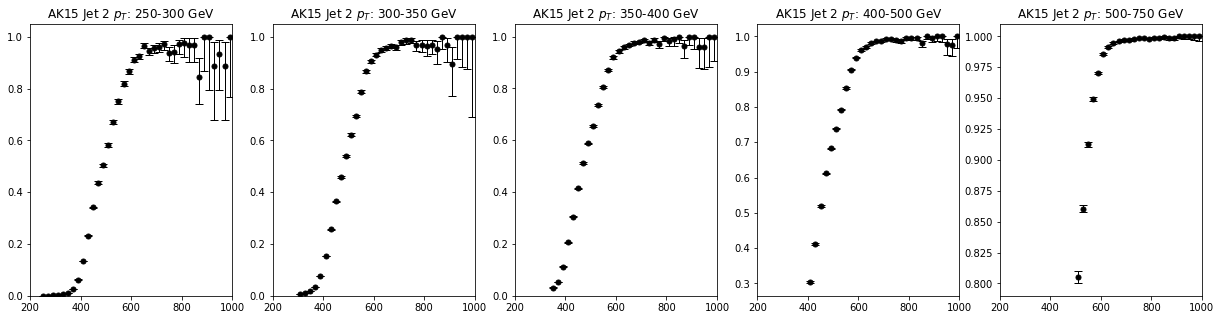

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(21,5))

ptbins = ['0-250','250-300', '300-350', '350-400', '400-500', '500-750', '750-1000']
for i in range(1,6):
    hep.histplot(jetpt_num[i,:]/jetpt_den[i,:], 
                 # yerr is the relative shift from the y value
                 yerr=abs(clopper_pearson_interval(jetpt_num[i,:].view(), jetpt_den[i,:].view()) - jetpt_num[i,:].view()/jetpt_den[i,:].view()),
                 ax = ax[i-1],
                 histtype='errorbar', color='k', capsize=4, elinewidth=1,
                
    )
    #ax[i-1].set_ylim(0, 1)
    ax[i-1].set_xlim(200, 1000)
    ax[i-1].set_title(r'AK15 Jet 2 $p_T$: %s GeV'%ptbins[i])
    
fig.savefig('1deff_%s.pdf'%tag)
